# Capstone Webscrapping using BeautifulSoup

This report will try to excavate information using web scrapping method using one of Python's library called beautifulsoup. Web scrapping is one of a method that can be used to collect certain data from various sources on internet. This report will use data from www.exchange-rates.org where it contains a table of historical exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD) within certain period of time.


In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib
import matplotlib.pyplot as plt
from flask import Flask, render_template
from io import BytesIO
import base64



## Requesting the Data and Creating a BeautifulSoup

Getting the information from the web with `get` method.

In [2]:
url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')


Confirming information gahtered from the web/ url:

In [3]:
url_get.content[1:1500]


b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />\n<link rel="dns-prefetch" href="https://ajax.googleapis.com/" />\r\n<link rel="dns-prefetch" href="https://www.google-analytics.com/" />\r\n<link rel="preload" href="https://dol8qrceshfrq.cloud

Transform a complex HTML document into a complex tree of Python objects using BeautifulSoup: 


In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))


<class 'bs4.BeautifulSoup'>


Printing BeautifulSoup result:

In [5]:
print(soup.prettify()[:1500])


<!DOCTYPE html>
<!--[if lt IE 9]>
    <html class="no-js ie8 oldie" lang='en' xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="C#" name="CODE_LANGUAGE">
   <meta content="JavaScript" name="vs_defaultClientScript"/>
   <meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema"/>
   <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
    <meta content="AP" name="mapping"/>
    <base href="https://www.exchange-rates.org/"/>
    <link href="https://ajax.googleapis.com/" rel="dns-prefetch"/>
    <link href="https://www.google-analytics.com/" rel="dns-prefetch"/>
    <link as="image" href="https://dol8qrceshfrq.cloudfront.n

## Getting right key to extract right information

Finding the key and put the key into the `.find()` to ensure right information has been gathered:

### Table Body (tbody)

In [6]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:1500])


table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    7/7/2021
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-7-2021">
     14,503.93654
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-7-2021">
     USD IDR rate for 7/7/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    7/6/2021
   </td>
   <td>
    Tuesday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-6-2021">
     14,469.58258
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-6-2021">
     USD IDR rate for 7/6/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    7/5/2021
   </td>
   <td>
    Monday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-5-2021">
     14,493.33968
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-5-2021">
     USD IDR rate for 7/5/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
 

The information gathered consists of a table where its contents is further defined as 'tr - similar to the division' and 'td - similar to section' in the HTML document. It is easily styled by using the class or id attribute, Any sort of content can be put inside these 'tr' and 'td' tag.

Initial observation indicated that there are 3 kinds of information can be gathered: Date, Day,Rates, and Additional Information.


### TR

In [7]:
tr = table.find_all('tr')
tr[:5]


[<tr><td>7/7/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/7-7-2021">14,503.93654</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-7-2021">USD IDR rate for 7/7/2021</a></td></tr>,
 <tr><td>7/6/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/7-6-2021">14,469.58258</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-6-2021">USD IDR rate for 7/6/2021</a></td></tr>,
 <tr><td>7/5/2021</td><td>Monday</td><td><a href="/Rate/USD/IDR/7-5-2021">14,493.33968</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-5-2021">USD IDR rate for 7/5/2021</a></td></tr>,
 <tr><td>7/2/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/7-2-2021">14,497.65100</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-2-2021">USD IDR rate for 7/2/2021</a></td></tr>,
 <tr><td>7/1/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/7-1-2021">13,270.37815</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rat

### TD

In [8]:
td = table.find_all('td')
td[:5]


[<td>7/7/2021</td>,
 <td>Wednesday</td>,
 <td><a href="/Rate/USD/IDR/7-7-2021">14,503.93654</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-7-2021">USD IDR rate for 7/7/2021</a></td>,
 <td>7/6/2021</td>]

### A - H-Ref

In [9]:
a = table.find_all('a')
a[:5]


[<a href="/Rate/USD/IDR/7-7-2021">14,503.93654</a>,
 <a href="/Rate/USD/IDR/7-7-2021">USD IDR rate for 7/7/2021</a>,
 <a href="/Rate/USD/IDR/7-6-2021">14,469.58258</a>,
 <a href="/Rate/USD/IDR/7-6-2021">USD IDR rate for 7/6/2021</a>,
 <a href="/Rate/USD/IDR/7-5-2021">14,493.33968</a>]

## Scapping Process

These are actions that will be taken when conducting looping process to scrap the information from the tbody:
- Establish a placeholder to receive the information that we scrap.
- Create a temporary placeholder temp.
- Execute loop process from one until the the length of the table row,
- Append  result to tuple.


In [10]:
temp = [] #initiating a tuple
        
for i in range(0, len(tr)):
    
    row = table.find_all('tr')[i]
    if len(row) == 4:

        #getting 'date' data info:
        date = row.find_all('td')[0].text
        date = date.strip() #to remove excess white space

        #getting 'day' data info:
        day = row.find_all('td')[1].text
        day = day.strip() #to remove excess white space
   
        #getting 'rate value' data info:
        idr = row.find_all('td')[2].text
        idr = idr.strip() #to remove excess white space
    
        #getting 'additional info' data info:
        note = row.find_all('td')[3].text
        note = note.strip() #to remove excess white space
 
    temp.append((date,day,idr,note)) 
    
temp


[('7/7/2021', 'Wednesday', '14,503.93654 IDR', 'USD IDR rate for 7/7/2021'),
 ('7/6/2021', 'Tuesday', '14,469.58258 IDR', 'USD IDR rate for 7/6/2021'),
 ('7/5/2021', 'Monday', '14,493.33968 IDR', 'USD IDR rate for 7/5/2021'),
 ('7/2/2021', 'Friday', '14,497.65100 IDR', 'USD IDR rate for 7/2/2021'),
 ('7/1/2021', 'Thursday', '13,270.37815 IDR', 'USD IDR rate for 7/1/2021'),
 ('6/30/2021', 'Wednesday', '14,491.89811 IDR', 'USD IDR rate for 6/30/2021'),
 ('6/29/2021', 'Tuesday', '13,215.84052 IDR', 'USD IDR rate for 6/29/2021'),
 ('6/28/2021', 'Monday', '14,439.22236 IDR', 'USD IDR rate for 6/28/2021'),
 ('6/25/2021', 'Friday', '14,426.82283 IDR', 'USD IDR rate for 6/25/2021'),
 ('6/24/2021', 'Thursday', '14,436.21247 IDR', 'USD IDR rate for 6/24/2021'),
 ('6/23/2021', 'Wednesday', '14,440.32729 IDR', 'USD IDR rate for 6/23/2021'),
 ('6/22/2021', 'Tuesday', '14,396.08712 IDR', 'USD IDR rate for 6/22/2021'),
 ('6/22/2021', 'Tuesday', '14,396.08712 IDR', 'USD IDR rate for 6/22/2021'),
 ('6/

## Creating Pandas Dataframe and Data Wrangling

Put the array into dataframe

In [11]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','day','idr','note'))
df.head(10)


,date,day,idr,note
0,7/7/2021,Wednesday,"14,503.93654 IDR",USD IDR rate for 7/7/2021
1,7/6/2021,Tuesday,"14,469.58258 IDR",USD IDR rate for 7/6/2021
2,7/5/2021,Monday,"14,493.33968 IDR",USD IDR rate for 7/5/2021
3,7/2/2021,Friday,"14,497.65100 IDR",USD IDR rate for 7/2/2021
4,7/1/2021,Thursday,"13,270.37815 IDR",USD IDR rate for 7/1/2021
5,6/30/2021,Wednesday,"14,491.89811 IDR",USD IDR rate for 6/30/2021
6,6/29/2021,Tuesday,"13,215.84052 IDR",USD IDR rate for 6/29/2021
7,6/28/2021,Monday,"14,439.22236 IDR",USD IDR rate for 6/28/2021
8,6/25/2021,Friday,"14,426.82283 IDR",USD IDR rate for 6/25/2021
9,6/24/2021,Thursday,"14,436.21247 IDR",USD IDR rate for 6/24/2021


Insights:
    - The Dataframe above has shown the same information as the source website on www.exchange-rates.org

Data Cleansing to convert Date into the proper Data Types:


In [12]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name()


Omitting 'IDR' on Exchange Rates:

In [13]:
df['idr'] = df['idr'].str.replace(" IDR","")
df['idr'] = df['idr'].str.replace(",","")
df.head()


,date,day,idr,note,month
0,2021-07-07,Wednesday,14503.93654,USD IDR rate for 7/7/2021,July
1,2021-07-06,Tuesday,14469.58258,USD IDR rate for 7/6/2021,July
2,2021-07-05,Monday,14493.33968,USD IDR rate for 7/5/2021,July
3,2021-07-02,Friday,14497.65100,USD IDR rate for 7/2/2021,July
4,2021-07-01,Thursday,13270.37815,USD IDR rate for 7/1/2021,July


In [14]:
df['idr'] = df['idr'].astype('float64').round(2)
df.head()

,date,day,idr,note,month
0,2021-07-07,Wednesday,14503.94,USD IDR rate for 7/7/2021,July
1,2021-07-06,Tuesday,14469.58,USD IDR rate for 7/6/2021,July
2,2021-07-05,Monday,14493.34,USD IDR rate for 7/5/2021,July
3,2021-07-02,Friday,14497.65,USD IDR rate for 7/2/2021,July
4,2021-07-01,Thursday,13270.38,USD IDR rate for 7/1/2021,July


## Data Visualization

Data visualization of Dataframe:

In [15]:
df = df.set_index('date')

<AxesSubplot:xlabel='date'>

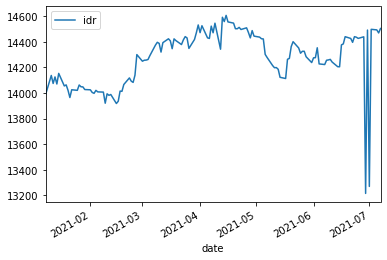

In [16]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Analysis and Conclusion

C:\ProgramData\Anaconda3\envs\da_capstone\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='month'>

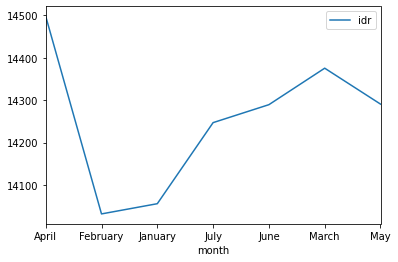

In [17]:
df.groupby('month').mean().plot()


C:\ProgramData\Anaconda3\envs\da_capstone\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='day'>

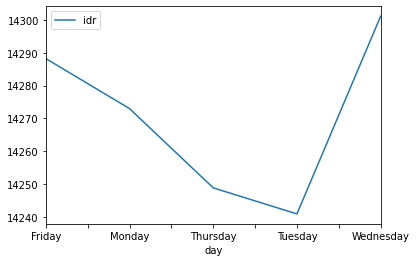

In [18]:
df.groupby('day').mean().plot()


From the graph above, it can be concluded that :
- The exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD) are relatively stable at range around 13900 up to 14600, except on July 2021 where the rates shows some inconsistency. Further analysis are needed especially when certain external factors are affecting the exchanges rates.
- February has relatively lower exchange rates average compared to other months, where April and March usually shows a relatively higher average excvhange rates.
- On average, Tuesday is considered having the lowest average on exchange rates, where Wednesday and Friday are among the highest average of exchange rates.


### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.